In [30]:
#import libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D
import tensorflow.keras as keras

from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
import seaborn as sns
from sklearn.metrics import classification_report

In [13]:
#load dataset
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

In [14]:
# Add a new axis
x_train = x_train[:, :, :, np.newaxis]
x_test = x_test[:, :, :, np.newaxis]

In [15]:
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

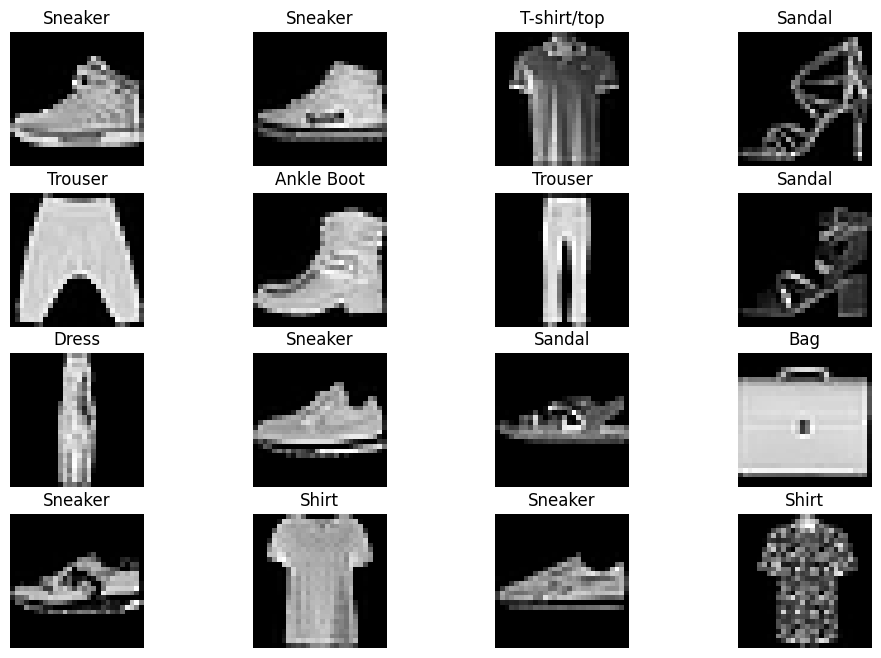

In [16]:
#data visualization
fig,axes=plt.subplots(4,4,figsize=(12,8))
for i, ax in enumerate(axes.flat):
    idx=np.random.randint(0,len(x_train))
    ax.imshow(x_train[idx],cmap='gray')
    ax.set_title(labels[y_train[idx]])
    ax.axis('off')

## Preprocessing

In [17]:
#encoding classes
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [18]:
#data standarization
x_train = x_train / 255.0
x_test = x_test / 255.0

## Model

In [19]:
#training model
model = Sequential()
# Layer 1 Conv2D
model.add(Conv2D(filters=6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=x_train[0].shape, padding="same"))
# Layer 2 Pooling Layer
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
# Layer 3 Conv2D
model.add(Conv2D(filters=16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
# Layer 4 Pooling Layer
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
model.add(Flatten())
model.add(Dense(units=120, activation='tanh'))
model.add(Dense(units=84, activation='tanh'))
model.add(Dense(units=10, activation='softmax'))
model.compile(optimizer='adam',loss=categorical_crossentropy,metrics=['accuracy'])

In [20]:
#number of trainable parameters
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [21]:
model.fit(x_train, y=y_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.5118 - accuracy: 0.8126
Epoch 2/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3698 - accuracy: 0.8654
Epoch 3/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3276 - accuracy: 0.8802
Epoch 4/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3005 - accuracy: 0.8891
Epoch 5/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2800 - accuracy: 0.8975
Epoch 6/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2629 - accuracy: 0.9027
Epoch 7/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2476 - accuracy: 0.9075
Epoch 8/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2347 - accuracy: 0.9132
Epoch 9/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2226 - accuracy: 0.9167
Epoch 10/20
1875/1875 [==============================] - 25s 14m

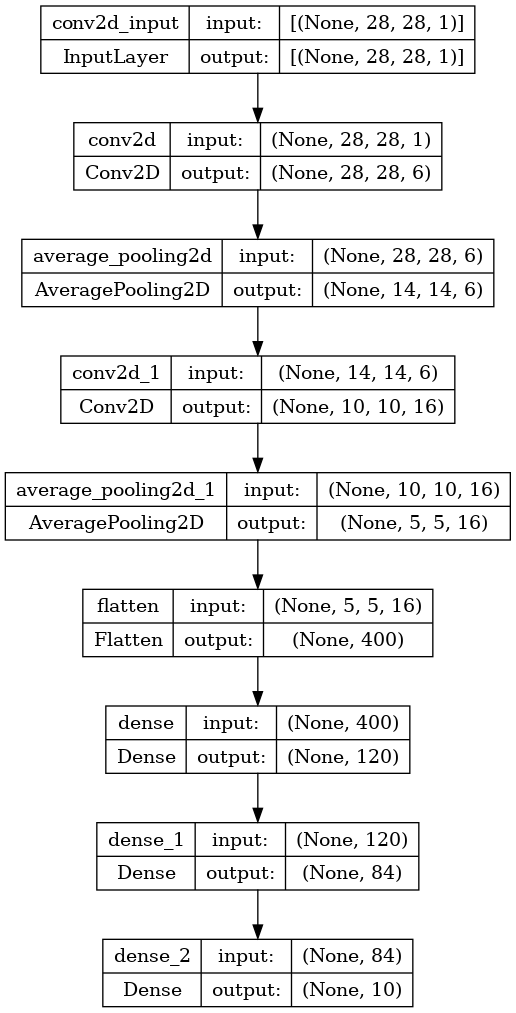

In [22]:
#model architecture
keras.utils.plot_model(model, to_file='model_1.png', show_shapes=True)

In [23]:
#accuracy
loss, acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.3373 - accuracy: 0.8958


## Confusion matrix

In [24]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(np.argmax(y_test,axis=1),np.argmax(model.predict(x_test),axis=1),labels=list(np.arange(0,10)))

313/313 [==============================] - 2s 6ms/step


Text(0.5, 58.7222222222222, 'Predicted label')

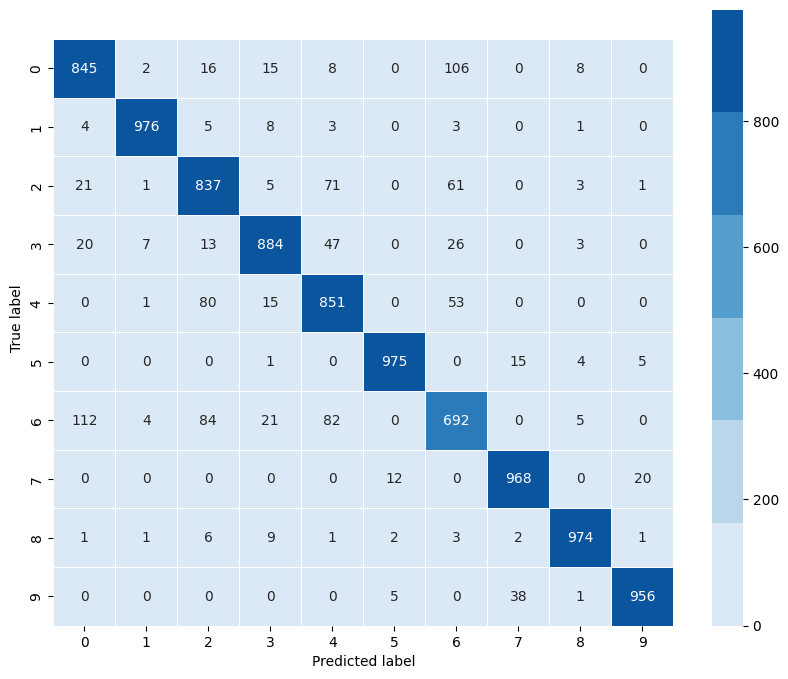

In [25]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,8)) 
sns.heatmap(confusion, annot=True,ax=ax,fmt="d",linewidths=.5,cmap=sns.color_palette("Blues"));
plt.ylim([ 10,-0.5,]);
plt.ylabel('True label')
plt.xlabel('Predicted label')

## Precision, Recall, F1-score

In [28]:
from sklearn.metrics import classification_report
target_names = ["Class 0", "Class 1", "Class 2", "Class 3", "Class 4", "Class 5", "Class 6", "Class 7", "Class 8", "Class 9"]
print(classification_report(np.argmax(y_test,axis=1),np.argmax(model.predict(x_test),axis=1), target_names=target_names))
report = classification_report(np.argmax(y_test, axis=1), np.argmax(model.predict(x_test), axis=1), target_names=target_names, output_dict=True)

313/313 [==============================] - 2s 6ms/step
              precision    recall  f1-score   support

     Class 0       0.84      0.84      0.84      1000
     Class 1       0.98      0.98      0.98      1000
     Class 2       0.80      0.84      0.82      1000
     Class 3       0.92      0.88      0.90      1000
     Class 4       0.80      0.85      0.83      1000
     Class 5       0.98      0.97      0.98      1000
     Class 6       0.73      0.69      0.71      1000
     Class 7       0.95      0.97      0.96      1000
     Class 8       0.97      0.97      0.97      1000
     Class 9       0.97      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

313/313 [==============================] - 2s 6ms/step


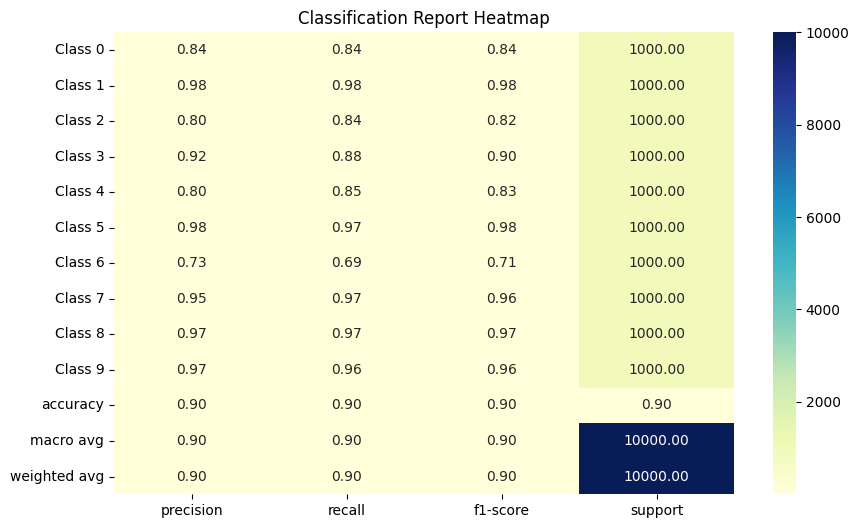

In [31]:
report_data = report
report_df = pd.DataFrame(report_data).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(report_df, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Classification Report Heatmap")
plt.show()

# Conclusion

we build a LetNet model archeticture on fashionMNIST dataset. after applying standarization and label encoding on data as preprocessing. we applied 2 con2D layers and after each layer there is average poling layer and used adam optimizer then we used tanh as activiation function in each layer and used softmac in last layer with accuracy 0.98
